In [1]:
from analysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib import rc

In [2]:
rc('text', usetex=True)
rc('font', family='sans-serif')

In [3]:
q_set = np.array([[0.05, 5], [0.1786, 15], [0.3071, 27], [0.4357, 39], 
                  [0.5643, 52], [0.6929, 67], [0.8214, 80], [0.95, 102]])
q_thresh = [j for (i,j) in q_set]
data_path = "arm3_q/data"
files = get_files_in_directory(data_path)
N = len(files)

In [4]:
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
print(pop_mean_acc)

5de42a01a7cb2401ccc682c3,1.95
5f0af097e7d15b3bf7734642,1.43
5e8654505276a10fe5e2633b,1.42
60e4a5d4b0e40567e60146e4,1.05
5f3ee36d0306de1a411882a5,1.15
605bb96c5facde74270615aa,1.01
5fc26815a9eca13fd5362ba3,1.11
6120d90a0d83120b87086355,1.04
5baba8dbc1155b0001174533,1.29
6445101fd46dd4427dfec91c,1.72
64526929d8f9b780b29d4d8d,1.27
611abe6af992f6d35f60c003,1.05
6165adc8da33afc997acf508,1.75
5fd85707af5bd719a5e20419,1.09
0.5994166666666666


# theoretical predictions

In [5]:
path = '../model/sims/'
df_q = pd.read_csv(path+'q_simulate_100_0725run.csv')

Text(0.5, 1.0, 'Model predictions for mean commitment time as a function of $q$')

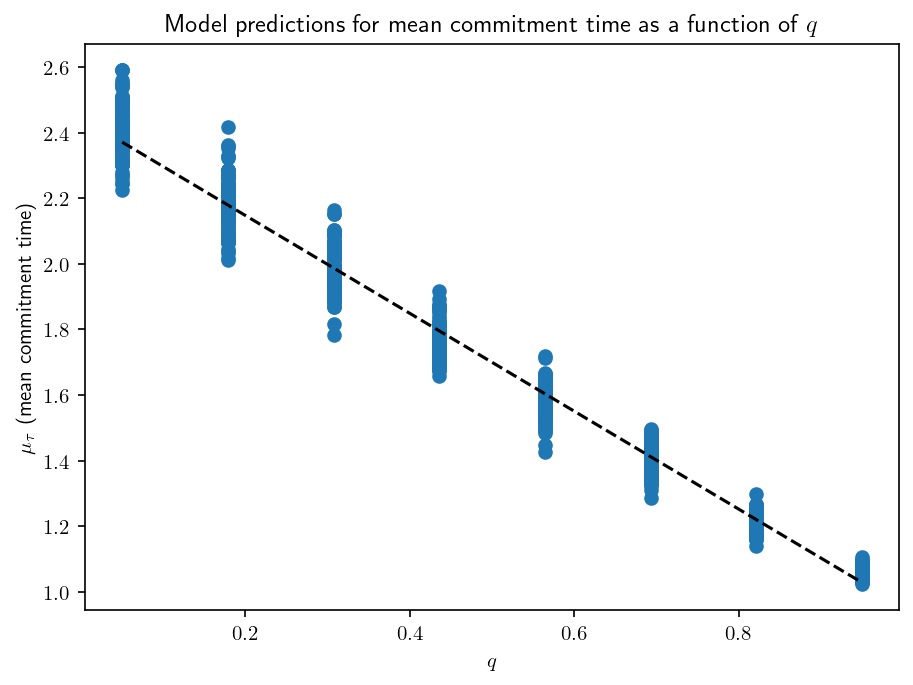

In [6]:
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
x,y = np.array(df_q['q']).reshape(-1,1), np.array(df_q['mu_i']).reshape(-1,1)
plt.scatter(np.array(df_q['q']), np.array(df_q['mu_i']))
fit_q, fit_mu, __, __ = get_linear_fit(x,y)
plt.plot(fit_q, fit_mu, 'k--')
plt.xlabel('$q$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.title('Model predictions for mean commitment time as a function of $q$')

# comparison before and after discarding first 70 trials

5de42a01a7cb2401ccc682c3,1.95
5f0af097e7d15b3bf7734642,1.43
5e8654505276a10fe5e2633b,1.42
60e4a5d4b0e40567e60146e4,1.05
5f3ee36d0306de1a411882a5,1.15
605bb96c5facde74270615aa,1.01
5fc26815a9eca13fd5362ba3,1.11
6120d90a0d83120b87086355,1.04
5baba8dbc1155b0001174533,1.29
6445101fd46dd4427dfec91c,1.72
64526929d8f9b780b29d4d8d,1.27
611abe6af992f6d35f60c003,1.05
6165adc8da33afc997acf508,1.75
5fd85707af5bd719a5e20419,1.09
5de42a01a7cb2401ccc682c3,1.95
5f0af097e7d15b3bf7734642,1.43
5e8654505276a10fe5e2633b,1.42
60e4a5d4b0e40567e60146e4,1.05
5f3ee36d0306de1a411882a5,1.15
605bb96c5facde74270615aa,1.01
5fc26815a9eca13fd5362ba3,1.11
6120d90a0d83120b87086355,1.04
5baba8dbc1155b0001174533,1.29
6445101fd46dd4427dfec91c,1.72
64526929d8f9b780b29d4d8d,1.27
611abe6af992f6d35f60c003,1.05
6165adc8da33afc997acf508,1.75
5fd85707af5bd719a5e20419,1.09
5de42a01a7cb2401ccc682c3,1.95
5f0af097e7d15b3bf7734642,1.43
5e8654505276a10fe5e2633b,1.42
60e4a5d4b0e40567e60146e4,1.05
5f3ee36d0306de1a411882a5,1.15
605bb96c5f

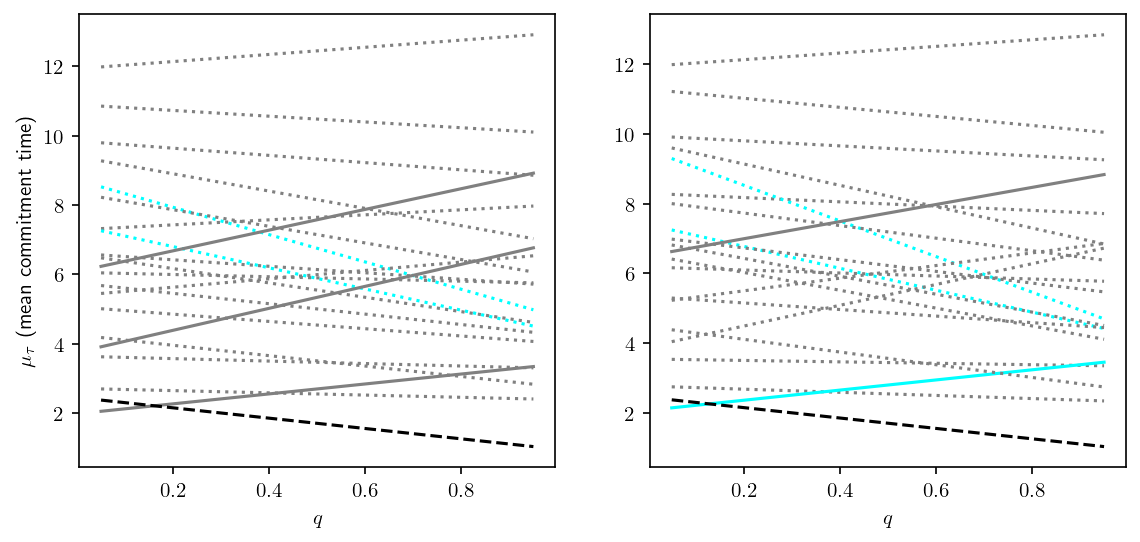

In [7]:
fig, ax = plt.subplots(figsize=(9,4),dpi=150)
plt.subplots_adjust(wspace=0.2)
plt.subplot(121)
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        q, __, mu_i, __ = get_mean_iai(df)
        x,y,l,c = get_linear_fit(q,mu_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('$q$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.plot(fit_q, fit_mu, 'k--')

plt.subplot(122)
discard = 70
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        q, __, mu_i, __ = get_mean_iai(df, discard)
        x,y,l,c = get_linear_fit(q,mu_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('$q$')
plt.plot(fit_q, fit_mu, 'k--')

5de42a01a7cb2401ccc682c3,1.95
5f0af097e7d15b3bf7734642,1.43
5e8654505276a10fe5e2633b,1.42
60e4a5d4b0e40567e60146e4,1.05
5f3ee36d0306de1a411882a5,1.15
605bb96c5facde74270615aa,1.01
5fc26815a9eca13fd5362ba3,1.11
6120d90a0d83120b87086355,1.04
5baba8dbc1155b0001174533,1.29
6445101fd46dd4427dfec91c,1.72
64526929d8f9b780b29d4d8d,1.27
611abe6af992f6d35f60c003,1.05
6165adc8da33afc997acf508,1.75
5fd85707af5bd719a5e20419,1.09


Text(0.5, 1.0, 'Accuracy across blocks for arm3\\_q')

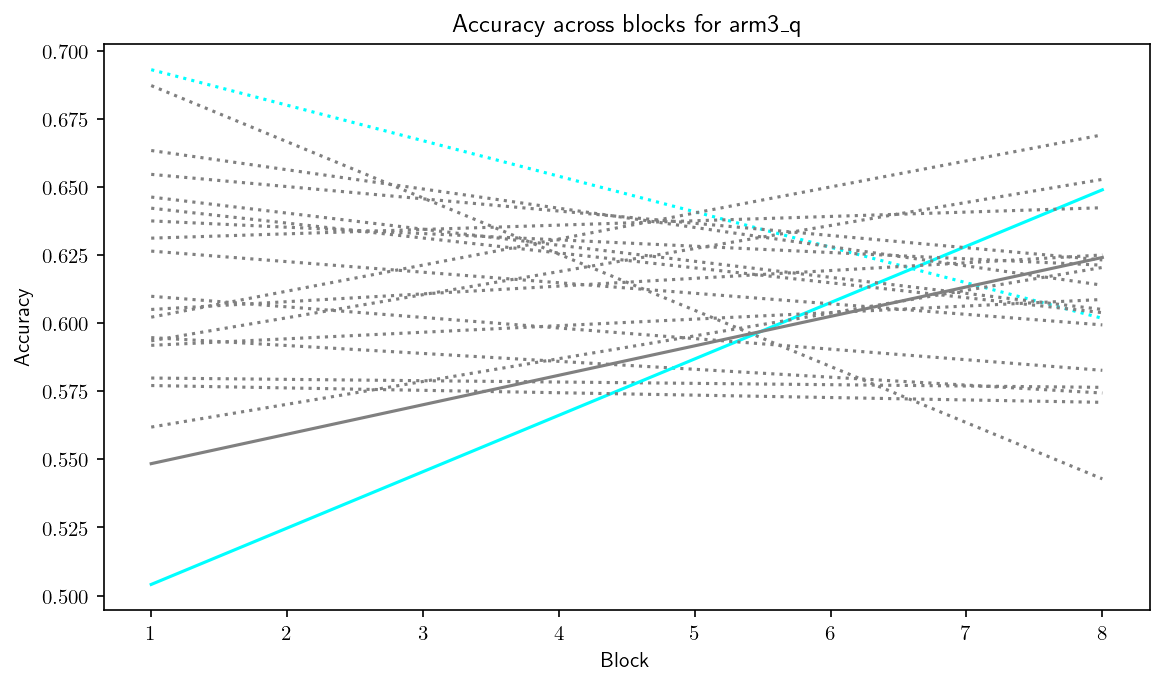

In [8]:
fig, ax = plt.subplots(figsize=(9,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        q, __, acc_i = get_accuracy(df)
        rounds = np.linspace(1,8,8).reshape(-1,1)
        x,y,l,c = get_linear_fit(rounds,acc_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy across blocks for arm3\_q')
# plt.plot(fit_q, fit_mu, 'k--')

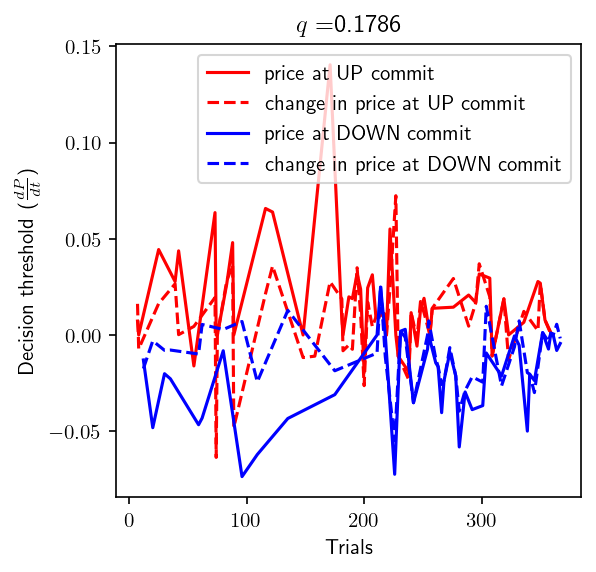

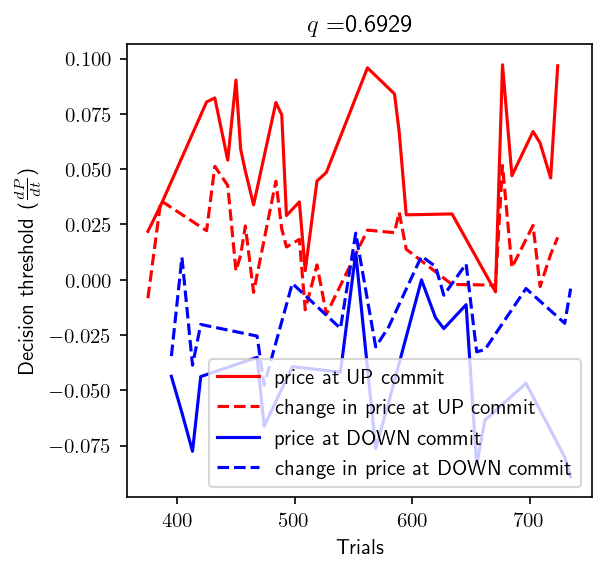

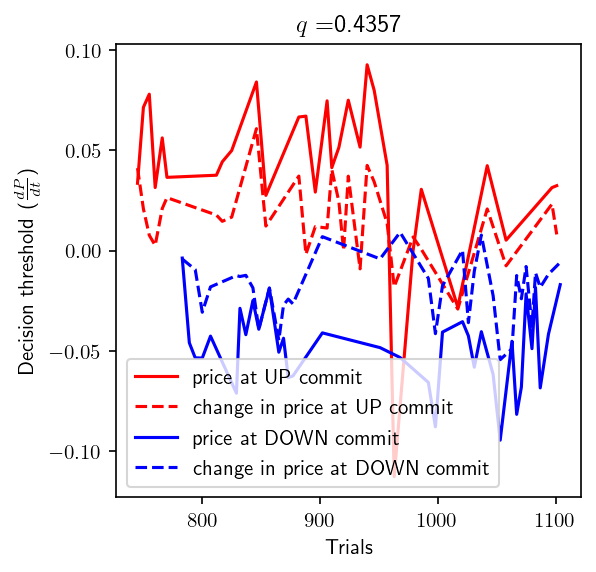

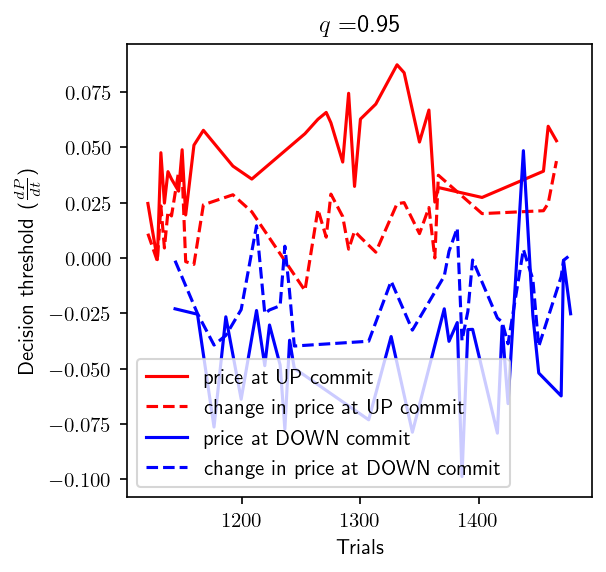

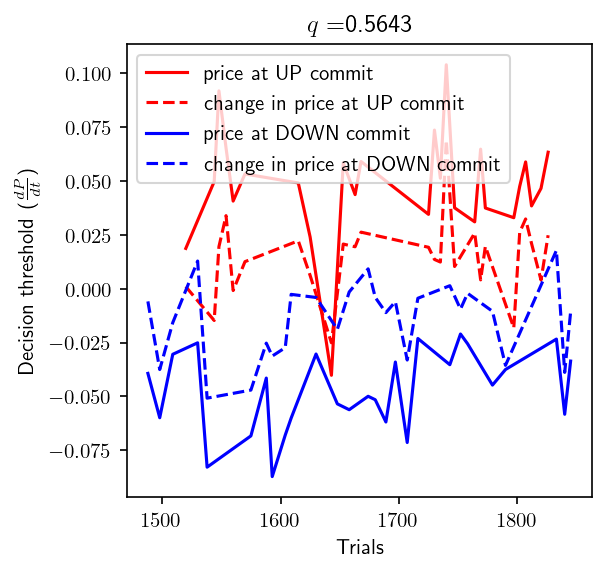

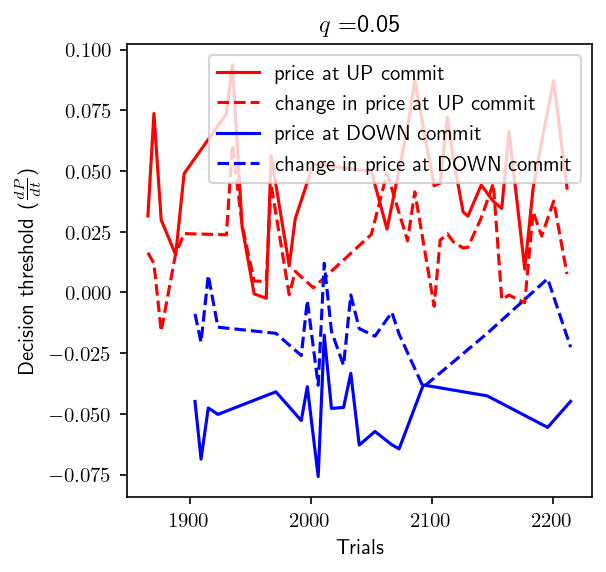

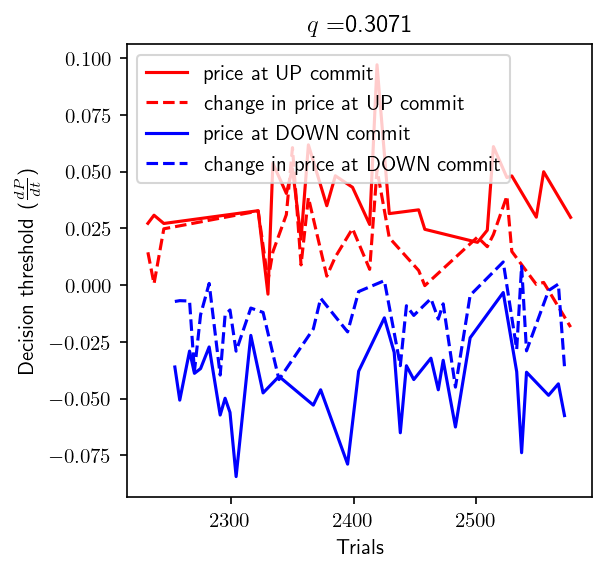

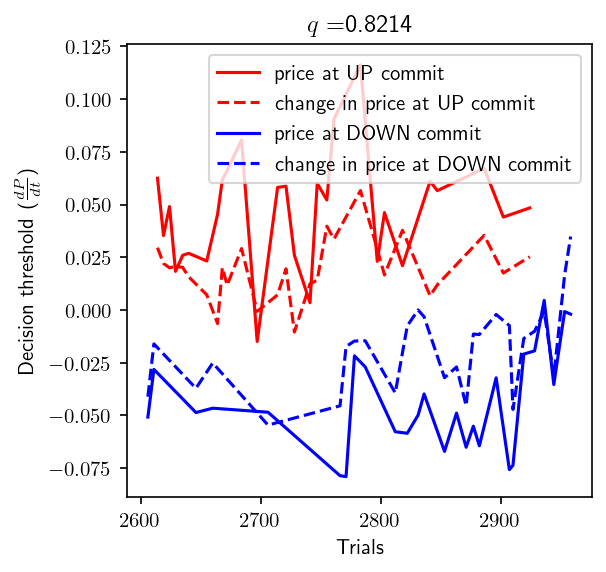

In [9]:
for i in range(1,numBlocks+1):
    fig, ax = plt.subplots(figsize=(4,4),dpi=150)
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    both = curBlock.index[np.abs(curBlock['resp.keys']) == 1]
    both = both - 1
    both = both[1:]
    plt.plot(df.iloc[ups]['price'], 'r', label = 'price at UP commit')
    plt.plot(df.iloc[ups]['dPrice_dt'], 'r--', label = 'change in price at UP commit')
    plt.plot(df.iloc[downs]['price'], 'b', label = 'price at DOWN commit')
    plt.plot(df.iloc[downs]['dPrice_dt'], 'b--', label = 'change in price at DOWN commit')
    plt.xlabel('Trials')
    plt.ylabel('Decision threshold ($\\frac{dP}{dt}$)')
    plt.title('$q = $' + str(curBlock['q_prob'].iloc[0]))
    plt.legend()
    plt.show()